# Compute some potentials from QE

In [1]:
import numpy as np
from qepy.driver import Driver
from qepy.io import QEInput

In [2]:
qe_options = {
    '&control': {
        'prefix' : "'tmp'",
        'outdir' : "'./'",
        'calculation': "'scf'",
        'pseudo_dir': "'./'"
    },
    '&system': {
        'ibrav' : 0,
        'degauss': 0.005,
        'ecutwfc': 30,
        'nat': 1,
        'ntyp': 1,
        'occupations': "'smearing'",
        'input_dft' : "'PBE'"
    },
    '&electrons': {
        'conv_thr' : 1e-8
    },
    'atomic_positions crystal': ['Al    0.0  0.0  0.0'],
    'atomic_species': ['Al  26.98 Al_ONCV_PBE-1.2.upf'],
    'k_points automatic': ['4 4 4 0 0 0'],
    'cell_parameters angstrom':[
        '0.     2.025  2.025',
        '2.025  0.     2.025',
        '2.025  2.025  0.   '],
}

In [3]:
driver=Driver(qe_options=qe_options, logfile='tmp.out')

In [4]:
driver.electrons()

-137.91449178319868

### Get local potential

In [5]:
v_loc = driver.get_local_pp()

### Compute hartree potential

In [6]:
v_h = driver.get_hartree_potential()

### Compute xc potential

In [7]:
v_xc = driver.get_exchange_correlation_potential()

### Additional potential can be evaluate by following

In [8]:
exttype = driver.embed.exttype
driver.embed.exttype=7
v_add = driver.get_density_functional_potential()
driver.embed.exttype = exttype

In [9]:
v_total = v_loc + v_h + v_xc + v_add

### Check the total potential

In [10]:
exttype = driver.embed.exttype
driver.embed.exttype = 0
v_ref = driver.get_effective_potential()
driver.embed.exttype = exttype

In [11]:
print((v_ref-v_total).max())

2.220446049250313e-16


In [12]:
if driver.is_root:
    print(v_total[:2,0], v_total.sum())

[-20.91332811 -18.49155397] -4627.035198681418


### Plot total potential and local potential

In [13]:
v_loc_3d = driver.data2field(v_loc)
v_total_3d = driver.data2field(v_total)

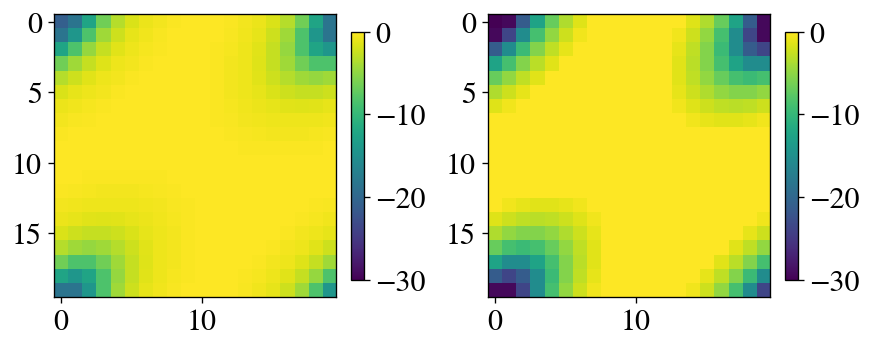

In [14]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)

im=axs[0].imshow(v_total_3d[0], vmin=-30, vmax=0.0)
fig.colorbar(im, ax=axs[0], fraction=0.04)

im=axs[1].imshow(v_loc_3d[0], vmin=-30, vmax=0.0)
fig.colorbar(im, ax=axs[1], fraction=0.04)

plt.subplots_adjust(wspace=0.4)